In [1]:
import pandas as pd
import nltk
import string
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\chish\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chish\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
abbreviations_dict = {
    "dr": "doctor",
    "mr": "mister",
    "mrs": "mistress",
    "ms": "miss",
    "prof": "professor",
    "st": "saint",
    "sr": "senior",
    "jr": "junior",
    "lt": "lieutenant",
    "col": "colonel",
    "gen": "general",
    "rev": "reverend",
    "hon": "honorable",
    "lol": "laughing out loud",
    "idk": "i do not know",
    "tbh": "to be honest",
    "imo": "in my opinion",
    "btw": "by the way",
    "omg": "oh my god",
    "brb": "be right back",
    "ttyl": "talk to you later",
    "fr": "for real",
    "u": "you",
    "dat": "that",
    "smh": "shake my head",
    "txt": "text",
    "ima": "i am going to",
    "youll": "you all",
    "lmfao": "laugh my fucking ass off",
    "amp": "and",
    "def": "definitely",
    "lmao": "laugh my ass off",
    "ig": "instagram",
    "im": "i am",
    "id": "identification",
    "ur": "your",
    "ppl": "people",
    "jus": "just",
    "dwn": "down",
    "idc": "i do not care",
    "wcw": "woman crush wednesday",
    "smfh": "shaking my fucking head",
    "tf": "the fuck",
    "foh": "fuck outta here",
    "iguess": "i guess",
    "gtfo": "get the fuck out",
    "omfg": "oh my fucking god",
    "ucf": "university of central florida",
    "rft": "roll field trash",
    "lmfaoooo": "laughing my fucking ass off",
    "af": "as fuck",
    "fohead": "forehead",
    "gtgtgt": "got to go to get",
    "scally": "british slang for a young working-class person",
    "mtvhottest": "mtvs hottest",
    "lmaoo": "laughing my ass off",
    "bc": "because",
    "dm": "direct message",
    "dmv": "department of motor vehicles",
    "fb": "facebook",
    "gf": "girlfriend",
    "gt": "got",
    "lmmfao": "laughing my motherfucking ass off",
    "plz": "please",
    "tho": "though",
    "wtf": "what the fuck",
    "ya": "you",
    "mr": "mister",
    "frfr": "for real for real",
    "rn": "right now",
    "asap": "as soon as possible",
    "finna": "fixing to (going to)",
    "yall": "you all",
    "stfu": "shut the fuck up",
    "kikis": "a fun gathering",
    "ummmmm": "an exclamation (informal)",
    "ymxb": "a mathematical equation format",
    "kno": "know",
    "bby": "baby",
    "cc": "community college or carbon copy",
    "woof woof": "a playful expression, mimicking a dog s bark",
    "bae": "before anyone else",
    "oomf": "one of my followers (on social media)",
    "wop": "a racial slur or a dance move",
    "yo": "your",
    "atm": "at the moment",
    "nfl": "national football league",
    "4ao": "for adults only",
    "am": "before midday",
    "a3": "anytime anywhere anyplace",
    "aamof": "as a matter of fact",
    "acct": "account",
    "adih": "another day in hell",
    "afaic": "as far as i am concerned",
    "afaict": "as far as i can tell",
    "afaik": "as far as i know",
    "afair": "as far as i remember",
    "afk": "away from keyboard",
    "app": "application",
    "approx": "approximately",
    "apps": "applications",
    "asl": "age, sex, location",
    "atk": "at the keyboard",
    "ny" :"not yet",
    "lmaooooooooooo": "lauhing my ass out",
    "ave": "avenue",
    "aymm": "are you my mother",
    "ayor": "at your own risk",
    "b&b": "bed and breakfast",
    "b+b": "bed and breakfast",
    "bc": "before christ",
    "b2b": "business to business",
    "b2c": "business to customer",
    "b4": "before",
    "b4n": "bye for now",
    "b@u": "back at you",
    "bak": "back at keyboard",
    "bbbg": "bye bye be good",
    "bbc": "british broadcasting corporation",
    "bbias": "be back in a second",
    "bbl": "be back later",
    "bbs": "be back soon",
    "be4": "before",
    "bfn": "bye for now",
    "blvd": "boulevard",
    "bout": "about",
    "bros": "brothers",
    "brt": "be right there",
    "bsaaw": "big smile and a wink",
    "bwl": "bursting with laughter",
    "c/o": "care of",
    "cet": "central european time",
    "cf": "compare",
    "cia": "central intelligence agency",
    "csl": "can not stop laughing",
    "cu": "see you",
    "cul8r": "see you later",
    "cv": "curriculum vitae",
    "cwot": "complete waste of time",
    "cya": "see you",
    "cyt": "see you tomorrow",
    "dae": "does anyone else",
    "dbmib": "do not bother me i am busy",
    "dats":"that is",
    "dawg":"friend",
    "diy" : "do it yourself",
    "dwh": "during work hours",
    "e123": "easy as one two three",
    "eet": "eastern european time",
    "eg": "example",
    "embm": "early morning business meeting",
    "encl": "enclosed",
    "encl": "enclosed",
    "etc": "and so on",
    "faq": "frequently asked questions",
    "fawc": "for anyone who cares",
    "fc": "fingers crossed",
    "fig": "figure",
    "fimh": "forever in my heart",
    "ft": "feet",
    "ft": "featuring",
    "ftl": "for the loss",
    "ftw": "for the win",
    "fwiw": "for what it is worth",
    "fyi": "for your information",
    "g9": "genius",
    "gahoy": "get a hold of yourself",
    "gal": "get a life",
    "gcse": "general certificate of secondary education",
    "gfn": "gone for now",
    "gg": "good game",
    "gl": "good luck",
    "glhf": "good luck have fun",
    "gmt": "greenwich mean time",
    "gmta": "great minds think alike",
    "gn": "good night",
    "goat": "greatest of all time",
    "goat": "greatest of all time",
    "goi": "get over it",
    "gps": "global positioning system",
    "gr8": "great",
    "gratz": "congratulations",
    "gyal": "girl",
    "h&c": "hot and cold",
    "hp": "horsepower",
    "hr": "hour",
    "hrh": "his royal highness",
    "ht": "height",
    "ibrb": "i will be right back",
    "ic": "i see",
    "icq": "i seek you",
    "icymi": "in case you missed it",
    "idgadf": "i do not give a damn fuck",
    "idgaf": "i do not give a fuck",
    "ie": "that is",
    "ie": "that is",
    "ifyp": "i feel your pain",
    "ig": "instagram",
    "iirc": "if i remember correctly",
    "ilu": "i love you",
    "ily": "i love you",
    "imho": "in my humble opinion",
    "imu": "i miss you",
    "iow": "in other words",
    "irl": "in real life",
    "j4f": "just for fun",
    "jic": "just in case",
    "jk": "just kidding",
    "jsyk": "just so you know",
    "l8r": "later",
    "lb": "pound",
    "lbs": "pounds",
    "ldr": "long distance relationship",
    "ltd": "limited",
    "ltns": "long time no see",
    "m8": "mate",
    "mf": "motherfucker",
    "mfs": "motherfuckers",
    "mfw": "my face when",
    "mofo": "motherfucker",
    "mph": "miles per hour",
    "mrw": "my reaction when",
    "ms": "miss",
    "mte": "my thoughts exactly",
    "nagi": "not a good idea",
    "nbc": "national broadcasting company",
    "nbd": "not big deal",
    "nfs": "not for sale",
    "ngl": "not going to lie",
    "nhs": "national health service",
    "nrn": "no reply necessary",
    "nsfl": "not safe for life",
    "nsfw": "not safe for work",
    "nth": "nice to have",
    "nvr": "never",
    "nyc": "new york city",
    "oc": "original content",
    "og": "original",
    "ohp": "overhead projector",
    "oic": "oh i see",
    "omdb": "over my dead body",
    "omw": "on my way",
    "pa": "per annum",
    "pm": "after midday",
    "pm": "prime minister",
    "poc": "people of color",
    "pov": "point of view",
    "pp": "pages",
    "prw": "parents are watching",
    "ps": "postscript",
    "pt": "point",
    "ptb": "please text back",
    "pto": "please turn over",
    "qpsa": "what happens",
    "ratchet": "rude",
    "rbtl": "read between the lines",
    "rlrt": "real life retweet",
    "rofl": "rolling on the floor laughing",
    "roflol": "rolling on the floor laughing out loud",
    "rotflmao": "rolling on the floor laughing my ass off",
    "rt": "",
    "ruok": "are you ok",
    "sfw": "safe for work",
    "sk8": "skate",
    "sq": "square",
    "srsly": "seriously",
    "ssdd": "same stuff different day",
    "tbs": "tablespooful",
    "tbsp": "tablespooful",
    "tfw": "that feeling when",
    "thks": "thank you",
    "thx": "thank you",
    "tia": "thanks in advance",
    "til": "today i learned",
    "tl;dr": "too long i did not read",
    "tldr": "too long i did not read",
    "tmb": "tweet me back",
    "tntl": "trying not to laugh",
    "u2": "you too",
    "u4e": "yours for ever",
    "utc": "coordinated universal time",
    "w/": "with",
    "w/o": "without",
    "w8": "wait",
    "wassup": "what is up",
    "wb": "welcome back",
    "wtg": "way to go",
    "wtpa": "where the party at",
    "wuf": "where are you from",
    "wuzup": "what is up",
    "wywh": "wish you were here",
    "yd": "yard",
    "ygtr": "you got that right",
    "ynk": "you never know",
    "zzz": "sleeping bored and tired",
    "amp": "and",
    "aint": "am not",
    "arent": "are not",
    "cant": "cannot",
    "couldnt": "could not",
    "didnt": "did not",
    "doesnt": "does not",
    "dont": "do not",
    "hadnt": "had not",
    "hasnt": "has not",
    "havent": "have not",
    "hed": "he had",
    "hell": "he will",
    "hes": "he is",
    "id": "i would",
    "ill": "i will",
    "im": "i am",
    "ive": "i have",
    "isnt": "is not",
    "its": "it is",
    "lets": "let us",
    "mightnt": "might not",
    "mustnt": "must not",
    "shant": "shall not",
    "shed": "she would",
    "shell": "she will",
    "shes": "she is",
    "shouldnt": "should not",
    "thats": "that is",
    "theres": "there is",
    "theyd": "they would",
    "theyll": "they will",
    "theyre": "they are",
    "theyve": "they have",
    "wed": "we had",
    "well": "we will",
    "were": "we are",
    "weve": "we have",
    "werent": "were not",
    "whatll": "what will",
    "whatre": "what are",
    "whats": "what is",
    "whatve": "what have",
    "wheres": "where is",
    "whod": "who would",
    "wholl": "who will",
    "whore": "who are",
    "whos": "who is",
    "whove": "who have",
    "wont": "will not",
    "wouldnt": "would not",
    "youd": "you would",
    "youll": "you will",
    "youre": "you are",
    "youve": "you have"
}

In [3]:
df=pd.read_csv('labeled_data.csv')

In [4]:

df.shape

(24783, 7)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB



# Removing usernames

In [6]:
# Function to remove usernames
def remove_usernames(tweet):
    return re.sub(r'@\w+', '', tweet)

# Apply the function to the DataFrame
df['tweet'] = df['tweet'].apply(remove_usernames)
df.head()


,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT : As a woman you shouldn't complain abo...
1,1,3,0,3,0,1,!!!!! RT : boy dats cold...tyga dwn bad for cu...
2,2,3,0,3,0,1,!!!!!!! RT Dawg!!!! RT : You ever fuck a bitc...
3,3,3,0,2,1,1,!!!!!!!!! RT : she look like a tranny
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT : The shit you hear about me ...


# removing special symbols

In [7]:
# Function to remove sequence
def remove_sequence(tweet):
    return re.sub(r'\b\d+\b', '', tweet)

# Apply the function to the DataFrame
df['tweet'] = df['tweet'].apply(remove_sequence)
df.head()


,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT : As a woman you shouldn't complain abo...
1,1,3,0,3,0,1,!!!!! RT : boy dats cold...tyga dwn bad for cu...
2,2,3,0,3,0,1,!!!!!!! RT Dawg!!!! RT : You ever fuck a bitc...
3,3,3,0,2,1,1,!!!!!!!!! RT : she look like a tranny
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT : The shit you hear about me ...


# Removing Urls

In [8]:
# function to remove urls
def remove_urls(tweet):
    return re.sub(r'http\S+|www\S+|https\S+|@\w+|#\w+', '', tweet, flags=re.MULTILINE)
df['tweet']= df['tweet'].apply(remove_urls)

# removing punctuations

In [9]:
df['tweet'] = df['tweet'].str.lower()
 
# Removing punctuations present in the text
punctuations_list = string.punctuation
def remove_punctuations(text):
    temp = str.maketrans('', '', punctuations_list)
    return text.translate(temp)
 
df['tweet']= df['tweet'].apply(lambda x: remove_punctuations(x))
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,rt as a woman you shouldnt complain about cl...
1,1,3,0,3,0,1,rt boy dats coldtyga dwn bad for cuffin dat ...
2,2,3,0,3,0,1,rt dawg rt you ever fuck a bitch and she st...
3,3,3,0,2,1,1,rt she look like a tranny
4,4,6,0,6,0,1,rt the shit you hear about me might be true ...


# Removing abbreviations

In [10]:

def replace_words(tweet, abbreviations_dict):
    # Create a regex pattern from the keys of the dictionary
    pattern = re.compile(r'\b(' + '|'.join(re.escape(key) for key in abbreviations_dict.keys()) + r')\b')
    # Replace matched words with their corresponding values
    return pattern.sub(lambda x: abbreviations_dict[x.group()], tweet)

# Apply the function to your DataFrame
df['tweet'] = df['tweet'].apply(lambda x: replace_words(x.lower(), abbreviations_dict))
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,as a woman you should not complain about cl...
1,1,3,0,3,0,1,boy that is coldtyga down bad for cuffin th...
2,2,3,0,3,0,1,friend you ever fuck a bitch and she star...
3,3,3,0,2,1,1,she look like a tranny
4,4,6,0,6,0,1,the shit you hear about me might be true or...


# Lemmatization

In [12]:
def remove_stopwords(text):
    stop_words = stopwords.words('english')
    imp_words = []
 
    # Storing the important words
    for word in str(text).split():
 
        if word not in stop_words:
 
        # Let's Lemmatize the word as well
        # before appending to the imp_words list.
 
            lemmatizer = WordNetLemmatizer()
            lemmatizer.lemmatize(word)
 
            imp_words.append(word)
 
    output = " ".join(imp_words)
 
    return output
 
 
df['tweet'] = df['tweet'].apply(lambda text: remove_stopwords(text))
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,woman complain cleaning house man always take ...
1,1,3,0,3,0,1,boy coldtyga bad cuffin hoe 1st place
2,2,3,0,3,0,1,friend ever fuck bitch start cry confused shit
3,3,3,0,2,1,1,look like tranny
4,4,6,0,6,0,1,shit hear might true might faker bitch told


In [13]:
df.to_csv('final.csv', index=False) #save as file

# Data visualization

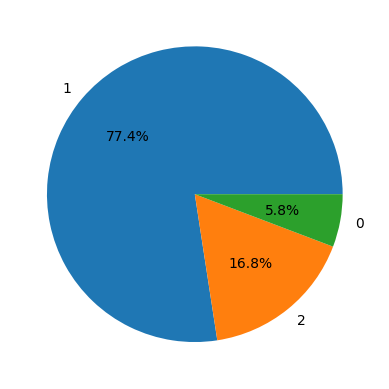

In [14]:
# class 0 - non offensive and no hate speech
# class 1 - offensive
# class 2 - hate speech
plt.pie(df['class'].value_counts().values,
		labels = df['class'].value_counts().index,
		autopct='%1.1f%%')
plt.show()


In [15]:
from wordcloud import WordCloud

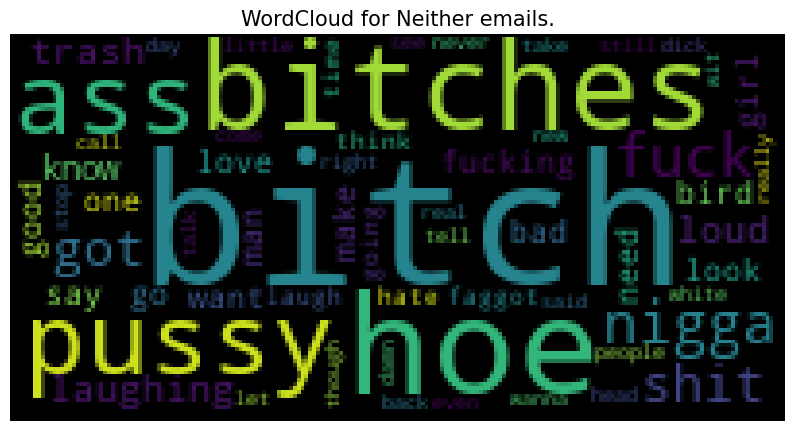

In [16]:
def plot_word_cloud(data, typ):
# Joining all the tweets to get the corpus
    email_corpus = " ".join(df['tweet'])

    plt.figure(figsize = (10,10))

    # Forming the word cloud
    wc = WordCloud(max_words = 100,
                    width = 200,
                    height = 100,
                    collocations = False).generate(email_corpus)

    # Plotting the wordcloud obtained above
    plt.title(f'WordCloud for {typ} emails.', fontsize = 15)
    plt.axis('off')
    plt.imshow(wc)
    plt.show()
    print()

plot_word_cloud(df[df['class']==2], typ='Neither')
